In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

### Importe o dataset 

In [2]:
mnist = datasets.load_digits()

In [3]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

### Divida o conjunto de dados em treino e teste. Para isso utilize o módulo train_test_split do scikit learn 


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

In [6]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [7]:
print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))
print("validation data points: {}".format(len(valLabels)))

training data points: 1212
testing data points: 450
validation data points: 135


### Inicialize os valores de k para o classificador KNN juntamente com uma lista para armazenar os valores da acurácia

In [8]:
kVals = range(1, 30, 2)
accuracies = []

### Utilize o KNeighborsClassifier do scikit learn para criar o seu classificador
https://scikit-learn.org/stable/modules/neighbors.html

In [9]:
for k in kVals:
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(trainData, trainLabels)
    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


### Imprima em um gráfico os valores da acurácia em função de k

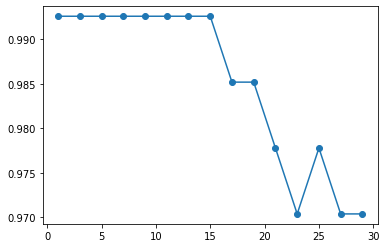

In [10]:
    plt.plot(kVals, accuracies, marker='o');

### Avaliação : Escolha o k com a melhor acurácia e avalie  o modelo utilizabdo as métricas de classificação disponíveis no Scikit-Learn

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

* confusion_matrix
* accuracy_score
* f1_score
* etc

In [11]:
from sklearn import metrics

In [12]:
models = {}

In [13]:
fmodel = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
fmodel.fit(trainData, trainLabels)
valPred = fmodel.predict(valData)
models['euclidean'] = {'Confusion Matrix': metrics.confusion_matrix(valLabels, valPred), 'Accuracy Score': metrics.accuracy_score(valLabels, valPred), 'F1 Score': metrics.f1_score(valLabels, valPred, average='macro'), 'Recall Score': metrics.recall_score(valLabels, valPred, average='macro'), 'Precision Score': metrics.precision_score(valLabels, valPred, average='macro')}

In [14]:
models['euclidean']

{'Confusion Matrix': array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 14,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 13,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15]]),
 'Accuracy Score': 0.9925925925925926,
 'F1 Score': 0.9915343915343915,
 'Recall Score': 0.9909090909090909,
 'Precision Score': 0.9928571428571429}

### Modifique o parâmetro metric do classficiador e avalie outras distâncias métricas disponíveis

In [15]:
fmodel = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
fmodel.fit(trainData, trainLabels)
valPred = fmodel.predict(valData)
models['manhattan'] = {'Confusion Matrix': metrics.confusion_matrix(valLabels, valPred), 'Accuracy Score': metrics.accuracy_score(valLabels, valPred), 'F1 Score': metrics.f1_score(valLabels, valPred, average='macro'), 'Recall Score': metrics.recall_score(valLabels, valPred, average='macro'), 'Precision Score': metrics.precision_score(valLabels, valPred, average='macro')}

In [16]:
models['manhattan']

{'Confusion Matrix': array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 14,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 13,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15]]),
 'Accuracy Score': 0.9925925925925926,
 'F1 Score': 0.9915343915343915,
 'Recall Score': 0.9909090909090909,
 'Precision Score': 0.9928571428571429}

In [17]:
fmodel = KNeighborsClassifier(n_neighbors=7, metric='chebyshev')
fmodel.fit(trainData, trainLabels)
valPred = fmodel.predict(valData)
models['chebyshev'] = {'Confusion Matrix': metrics.confusion_matrix(valLabels, valPred), 'Accuracy Score': metrics.accuracy_score(valLabels, valPred), 'F1 Score': metrics.f1_score(valLabels, valPred, average='macro'), 'Recall Score': metrics.recall_score(valLabels, valPred, average='macro'), 'Precision Score': metrics.precision_score(valLabels, valPred, average='macro')}

In [18]:
models['chebyshev']

{'Confusion Matrix': array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 11,  0,  0,  0,  0,  1,  0,  1,  0],
        [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  0, 13,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  0,  0, 16,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0, 12,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15]]),
 'Accuracy Score': 0.9555555555555556,
 'F1 Score': 0.9553602693602693,
 'Recall Score': 0.9548069577481341,
 'Precision Score': 0.9567821067821068}

In [19]:
fmodel = KNeighborsClassifier(n_neighbors=7, metric='cosine')
fmodel.fit(trainData, trainLabels)
valPred = fmodel.predict(valData)
models['cosine'] = {'Confusion Matrix': metrics.confusion_matrix(valLabels, valPred), 'Accuracy Score': metrics.accuracy_score(valLabels, valPred), 'F1 Score': metrics.f1_score(valLabels, valPred, average='macro'), 'Recall Score': metrics.recall_score(valLabels, valPred, average='macro'), 'Precision Score': metrics.precision_score(valLabels, valPred, average='macro')}

In [20]:
models['cosine']

{'Confusion Matrix': array([[11,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 14,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 13,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0, 10,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15]]),
 'Accuracy Score': 0.9925925925925926,
 'F1 Score': 0.9915343915343915,
 'Recall Score': 0.9909090909090909,
 'Precision Score': 0.9928571428571429}

In [21]:
df = pd.DataFrame.from_dict(models).drop(['Confusion Matrix'])

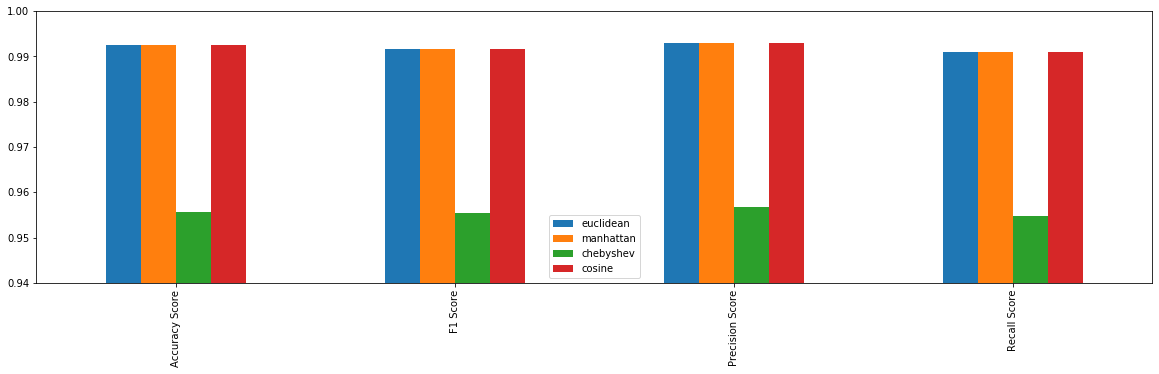

In [23]:
df.plot(kind='bar', ylim=(0.94, 1.0), figsize=(20, 5));